## THEORITICAL

**Q1. What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?**

**Ans:** The fundamental idea behind ensemble techniques is to combine multiple models (often called "weak learners") to form a stronger, more accurate and more robust overall model.

Difference between Bagging and Boosting:
1. Approach:

* Bagging: Trains multiple models in parallel, each on a random subset of the data.

* Boosting: Trains models sequentially, where each model learns from the errors of the previous ones.

2. Objective:

* Bagging: Aims to reduce variance and make predictions more stable.

* Boosting: Aims to reduce bias and improve model accuracy.

**Q2. Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.**

**Ans:** `The Random Forest Classifier` reduces overfitting by combining the predictions of many independent decision trees, each trained on a different random subset of the data and features.

A `single decision tree `tends to overfit because it tries to perfectly classify the training data, capturing noise and specific patterns that don’t generalize well. Random Forest mitigates this through randomization and averaging.

The role of two key hyperparameters in this process are:
1. `n_estimators`: It refers to the number of trees in the forest.
2. `max_features`: It refers to the number of features considered when splitting a node.

**Q3. What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.**

**Ans:** Stacking is an ensemble learning technique that combines the predictions of multiple different models (called base learners) using a meta-model that learns how to best combine their output.

In bagging/boosting we use the same type of base model ie the decision tree but in stacking we use different types of base models ie. SVM, Logical Regression or Random
Forest.

Example:

Predict whether a student will **pass or fail** bssed on study hours, attendance and internal marks.


STEP 1: **BASE MODEL**

Train different algorithms on the same training data:

* Logistic Regression → handles linear relationships

* Decision Tree → captures non-linear patterns

* K-Nearest Neighbors (KNN) → considers similarity between students

Each model gives its own prediction: Pass (1) or Fail (0).

STEP 2: **META-MODEL**

Train a meta-model (e.g., Random Forest or another Logistic Regression)
using the predictions from the base models as new input features.

This meta-model learns:

* When to trust Logistic Regression (e.g., for consistent attendance)

* When to trust Decision Tree (e.g., for irregular patterns)

* When to trust KNN (e.g., for students similar to known cases)

STEP 3: **FINAL PREDICTION**

When a new student’s data is given:

* Each base model predicts pass/fail.

* The meta-model combines these predictions to produce the final decision.

**Q4.What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?**


**Ans:** The Out-of-Bag (OOB) score is a built-in performance estimate used in Random Forests that acts like an internal cross-validation.

It is useful for following reasons:
1. The OOB score provides a built-in estimate of model performance, saving data for actual testing.
2. You get an unbiased accuracy estimate during training, without additional computation like k-fold cross-validation.
3. If the OOB score and training accuracy differ greatly, it may indicate overfitting.

The OOB (Out-of-Bag) score helps in model evaluation without needing a separate validation set because of how Random Forests use bootstrap sampling during training.

**Q5. Compare AdaBoost and Gradient Boosting in terms of:**

1. How they handle errors from weak learners
2. Weight adjustment mechanism
3. Typical use cases

**Ans:** Here’s a pointwise comparison between AdaBoost and Gradient Boosting.
1. **Error Handling**:

* *AdaBoost*: Focuses on misclassified samples; gives them higher importance in the next iteration.

* *Gradient Boosting*: Focuses on residual errors (the difference between actual and predicted values) and tries to minimize them.

2. **Weight Adjustment Mechanism**:

* *AdaBoost*:

* Increases weights of misclassified samples.

* Decreases weights of correctly classified samples.

* Combines learners using weighted voting or averaging.

* *Gradient Boosting*:

* Does not change sample weights directly.

* Uses gradient descent to minimize a chosen loss function.

* Each new tree corrects the errors (residuals) from the previous ensemble.

3. **Typical Use Cases:**

* *AdaBoost*: Mostly used for classification tasks (e.g., spam detection, face recognition).

* *Gradient Boosting*: Used for both classification and regression tasks, and popular in Kaggle competitions (e.g., XGBoost, LightGBM).

**Q6. Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.**

**Ans:** CatBoost (short for Categorical Boosting) is designed to handle categorical variables natively, without needing extensive preprocessing like one-hot or label encoding.

CatBoost Handles Categorical Variables:
1. No Manual Encoding Needed:

* You can pass categorical columns directly to CatBoost.

* It automatically detects and encodes them internally.

2. Combination of Features:

* CatBoost also creates combinations of categorical features (e.g., city + device_type) to capture higher-order interactions automatically.

3. Efficient and Regularized:

* Its encoding process is randomized and regularized, making it less prone to overfitting compared to standard target encoding.

# PRACTICAL

**Q7. KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:**
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.


In [ ]:
# KNN Classifier on Wine Dataset with Optimization
# --------------------------------------------------

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the dataset
wine = load_wine()
X, y = wine.data, wine.target

# 2. Split into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Train KNN without scaling (default K=5)
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

print("===== Without Scaling =====")
print("Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print(classification_report(y_test, y_pred_unscaled))

# 4. Apply StandardScaler, retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n===== With StandardScaler =====")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

# 5. Use GridSearchCV to find best K (1–20) and distance metric
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("\n===== GridSearchCV Results =====")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# 6. Train optimized KNN
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\n===== Optimized KNN (After GridSearchCV) =====")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# 7. Summary Comparison
print("\n===== Summary Comparison =====")
print(f"Unscaled Accuracy: {accuracy_score(y_test, y_pred_unscaled):.4f}")
print(f"Scaled Accuracy:   {accuracy_score(y_test, y_pred_scaled):.4f}")
print(f"Optimized Accuracy:{accuracy_score(y_test, y_pred_best):.4f}")


===== Without Scaling =====
Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


===== With StandardScaler =====
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


===== GridSearchCV Results =====
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11}
Best Cross-Validation Acc

**Q8. PCA + KNN with Variance Analysis and Visualization
Task:**
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).



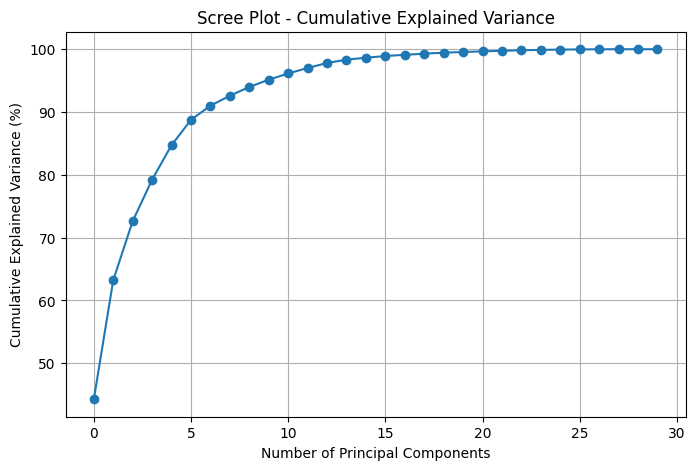

Number of components to retain 95% variance: 10

===== KNN Accuracy Comparison =====
Original Data Accuracy: 0.9708
PCA (95% Variance) Accuracy: 0.9474


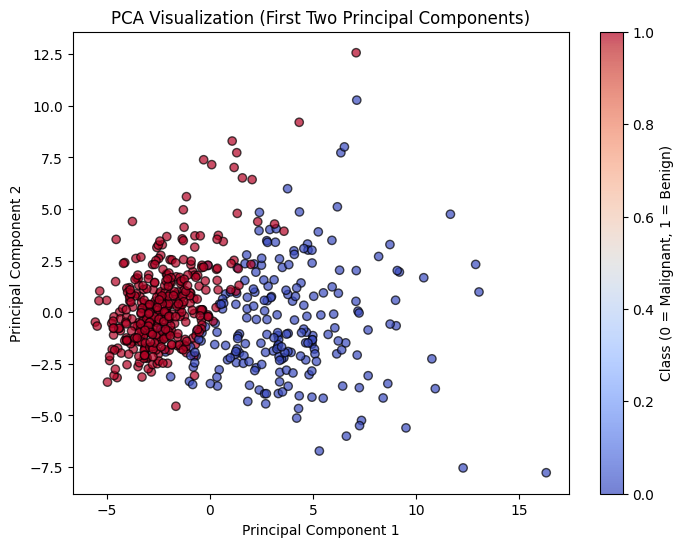

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1️. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2️. Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️. Apply PCA (all components first for analysis)
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# 4. Plot Scree Plot (Explained Variance Ratio)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_) * 100, marker='o')
plt.title("Scree Plot - Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.grid(True)
plt.show()

# 5. Retain 95% variance and transform data
pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X_scaled)
print(f"Number of components to retain 95% variance: {pca_95.n_components_}")

# 6️. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# 7. Train KNN on original data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_orig = knn_original.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

# 8. Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)
y_pred_pca = knn_pca.predict(X_pca_test)
acc_pca = accuracy_score(y_test, y_pred_pca)

# 9. Compare Accuracy
print("\n===== KNN Accuracy Comparison =====")
print(f"Original Data Accuracy: {acc_orig:.4f}")
print(f"PCA (95% Variance) Accuracy: {acc_pca:.4f}")

# 10. Visualize first two principal components (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("PCA Visualization (First Two Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.show()

**Q9. KNN Regressor with Distance Metrics and K-Value
Analysis
Task:**
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.




===== KNN Regressor Comparison (K=5) =====
Euclidean Distance MSE: 4989.2901
Manhattan Distance MSE: 5558.4380


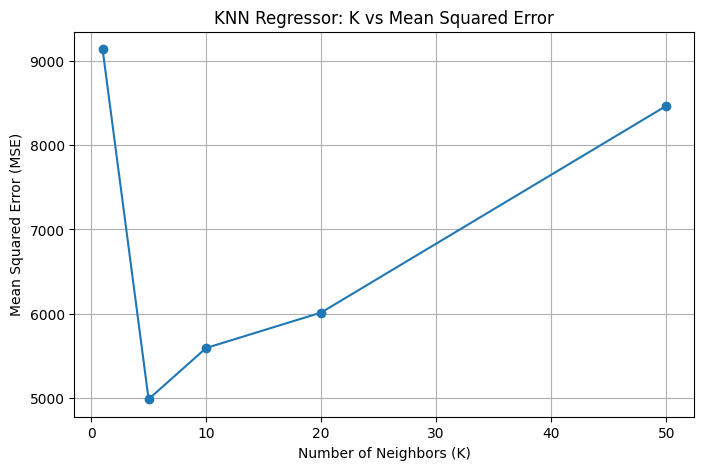


===== Bias-Variance Analysis =====
→ Small K (like 1): Low bias, high variance (fits noise).
→ Large K (like 50): High bias, low variance (smooth predictions).
→ Optimal K lies between, minimizing MSE.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 1. Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)

# 2. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale features (important for distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN Regressor with Euclidean and Manhattan distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')

knn_euclidean.fit(X_train_scaled, y_train)
knn_manhattan.fit(X_train_scaled, y_train)

y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)

# 5. Compute Mean Squared Error (MSE)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("===== KNN Regressor Comparison (K=5) =====")
print(f"Euclidean Distance MSE: {mse_euclidean:.4f}")
print(f"Manhattan Distance MSE: {mse_manhattan:.4f}")

# 6. Test different K values to analyze bias-variance tradeoff
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# 7. Plot K vs MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o')
plt.title("KNN Regressor: K vs Mean Squared Error")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()

# 8. Interpretation
print("\n===== Bias-Variance Analysis =====")
print("→ Small K (like 1): Low bias, high variance (fits noise).")
print("→ Large K (like 50): High bias, low variance (smooth predictions).")
print("→ Optimal K lies between, minimizing MSE.")

**Q10. KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:**
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).

Dataset: Pima Indians Diabetes

Original dataset shape: (768, 9)
Missing values before imputation (0-values considered missing):
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Missing values after KNN imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

===== KNN Algorithm Comparison =====
           Accuracy  Train Time (s)
brute      0.735931        0.001329
kd_tree    0.735931        0.001977
ball_tree  0.735931        0.001784

Best Performing Algorithm: brute
Top 2 important features: ['BMI', 'Glucose']


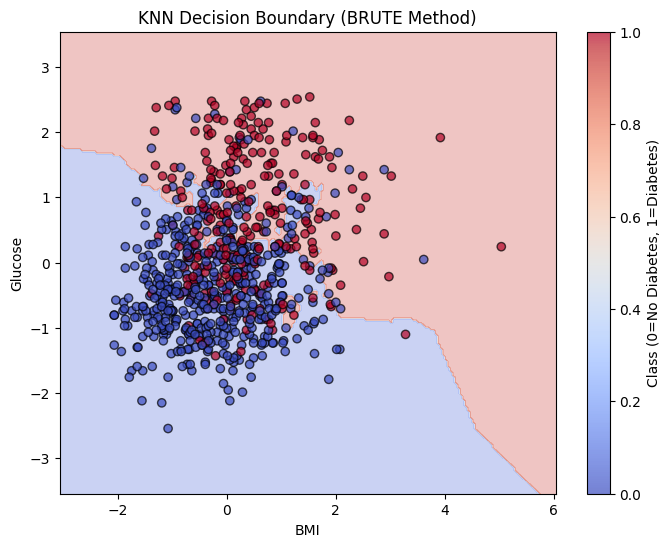

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif

# 1. Load the Pima Indians Diabetes dataset
# You can download from: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
# Columns per dataset documentation:
columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data = pd.read_csv(url, names=columns)

print("Original dataset shape:", data.shape)
print("Missing values before imputation (0-values considered missing):")
print((data == 0).sum())

# 2. Replace zero values in certain columns with NaN (as they are missing indicators)
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_missing] = data[cols_with_missing].replace(0, np.nan)

# 3. KNN Imputation to fill missing values
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=columns)

print("\nMissing values after KNN imputation:")
print(data_imputed.isnull().sum())

# 4. Split data into features and labels
X = data_imputed.drop('Outcome', axis=1)
y = data_imputed['Outcome']

# 5. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train-test split (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 7. Train KNN using three algorithms and compare
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)

    start_time = time.time()
    knn.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results[algo] = {'Accuracy': acc, 'Train Time (s)': train_time}

# 8. Display comparison results
results_df = pd.DataFrame(results).T
print("\n===== KNN Algorithm Comparison =====")
print(results_df)

# 9. Find best performing method
best_algo = results_df['Accuracy'].idxmax()
print(f"\nBest Performing Algorithm: {best_algo}")

# 10. Feature importance analysis (for visualization)
mi_scores = mutual_info_classif(X, y, random_state=42)
important_features = np.argsort(mi_scores)[-2:]  # top 2 features
print(f"Top 2 important features: {X.columns[important_features].tolist()}")

# 11. Train model on 2D data using best method
X_2d = X_scaled[:, important_features]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.3, random_state=42, stratify=y)

best_knn = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
best_knn.fit(X_train_2d, y_train_2d)

# 12. Plot decision boundary
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title(f"KNN Decision Boundary ({best_algo.upper()} Method)")
plt.xlabel(X.columns[important_features[0]])
plt.ylabel(X.columns[important_features[1]])
plt.colorbar(label="Class (0=No Diabetes, 1=Diabetes)")
plt.show()